## import modules

In [1]:
from compname import ChemFormula, TriChemFormula
from feature import CreateFeature
from mlops import WrapperMethod
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import pickle
from trigraph import TriView

## Loading data and model

In [2]:
df_learning = pd.read_pickle("./data/df_learning_lasso.pkl")
model = pickle.load(open("./data/lasso_model.sav", 'rb'))

## Creating a feature set of the composition you want to predict

In [3]:
# creating chemical formula
atoms = ["Pb", "Sn", "La"]
tcf = TriChemFormula()
comp = tcf.get_tri_name(atoms, delta = 0.1, conductor_atom = "F")

# creating moler ratio
path = "./data/atom.csv"
cn = ChemFormula(path)

# all, only F, not F
all_molratio = cn.get_molratio(comp)
f_molratio = cn.get_molratio(comp, obj_atoms=["F"])
cation_molratio = cn.get_molratio(comp, exc_atoms=["F"])

# creating molratio(dict)
dict_molratio = {
    "All" : all_molratio,
    "F" : f_molratio,
    "Cation" : cation_molratio
    }

# creating features of composition
cf = CreateFeature()

# get average features
dict_feature = cf.get_ave_features(dict_molratio)

# adding std features
dict_feature.update(cf.get_std_features(dict_molratio, exc=["F", "All"]))

# adding max features
dict_feature.update(cf.get_max_features(dict_molratio, exc=["F"]))

# adding min features
dict_feature.update(cf.get_min_features(dict_molratio, exc=["F"]))

# creating a new feature
dict_feature["Cation(Ave)/F(Ave)"] = dict_feature["Cation(Ave)"] / dict_feature["F(Ave)"]
dict_feature["All(Max)/F(Ave)"] = dict_feature["All(Max)"] / dict_feature["F(Ave)"]
dict_feature["All(Min)/F(Ave)"] = dict_feature["All(Min)"] / dict_feature["F(Ave)"]

# creating dataframe of predicting
df = cf.get_df_learning(dict_feature, comp)
df = df[df_learning.columns.values]

## Predicting conductivity

In [4]:
y_pre = model.predict(df.values)

## Outputing a triangle diagram

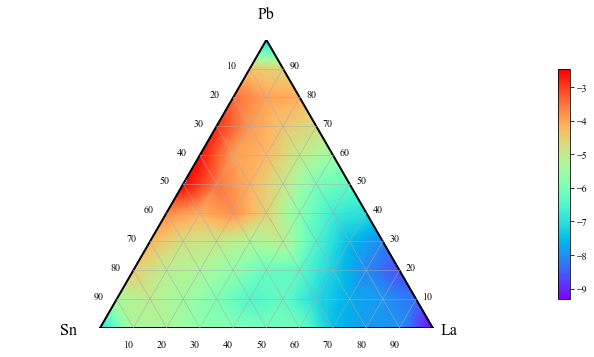

In [5]:
pseudo_ratio = tcf.get_only_pseudo_ratio(comp,  atoms)
tv = TriView()
graph = tv.get_tri_graph(atoms, pseudo_ratio, y_pre)

## Addinng plot

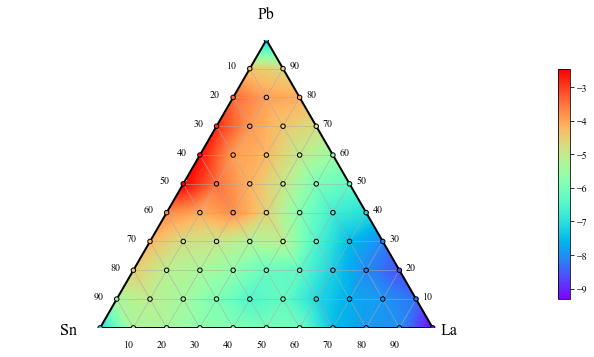

In [6]:
graph = tv.add_plot(graph, pseudo_ratio, y_pre)
graph

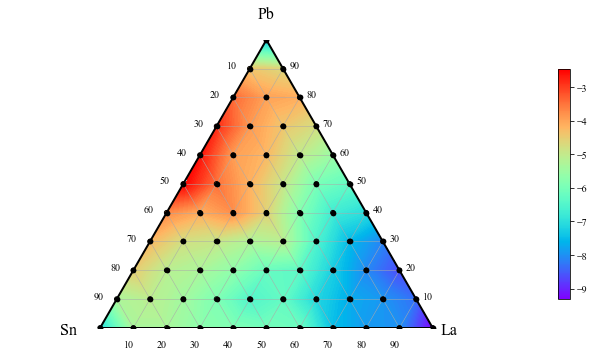

In [8]:
graph = tv.add_plot(graph, pseudo_ratio)
graph